In [204]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
#from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import PIL.Image
#from PIL import ImageEnhance



import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [205]:
data=r'C:\Users\LENOVO\Desktop\Card_datection\Data_tri'

In [206]:
import pathlib

In [207]:
data = pathlib.Path(data)
data

WindowsPath('C:/Users/LENOVO/Desktop/Card_datection/Data_tri')

In [208]:
str(data)

'C:\\Users\\LENOVO\\Desktop\\Card_datection\\Data_tri'

In [209]:
ID_card_dict_train = {
    'Front': list(data.glob('Front/*')),
    'Back': list(data.glob('Back/*'))
}

In [210]:
ID_card_label_train = {
    'Front': 0,
    'Back': 1
}

In [ ]:
a = random.randint(0,150)
ID_card_dict_train['Front'][a]

In [ ]:
img = PIL.Image.open(ID_card_dict_train['Front'][a])
plt.imshow(img)

In [213]:
X, y = [], []

In [214]:
#for side, images in ID_card_dict_train.items():
#    for image in images:
#        print(str(images))

In [215]:
for side, images in ID_card_dict_train.items():
    for image in images:
        #img = cv2.imread(str(image))
        img = cv2.imdecode(np.fromfile(str(image), dtype=np.uint8), cv2.IMREAD_UNCHANGED)
        #print(img.shape)
        resized_img = cv2.resize(img,(100,50), interpolation=cv2.INTER_LINEAR) # if there are any pics without a 224 size
        #resized_img = cv2.resize(img,(100,50))
        resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        resized_img = resized_img[:, :, np.newaxis]
        #cv2.imshow("output", resized_img)
        #cv2.waitKey(0)
        X.append(resized_img)
        y.append(ID_card_label_train[side])

In [ ]:
for i in X:
    #print(i)
    #img = PIL.Image.open(ID_card_dict_train['Front'][1])
    #plt.imshow(i)
    #cv2.imshow("output", resized_img)
    #cv2.waitKey(0)
    print(i.shape)

In [217]:
X = np.array(X)
y = np.array(y)

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)

In [219]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(50,100,1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [220]:
#X_train = tf.expand_dims(X_train, axis=-1)
#X_train = X_train.reshape(100, 50, -1) 
#X_train=np.reshape(X_train,(X_train.shape[0], X_train.shape[1], X_train.shape[2],1))
#X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1], X_test.shape[2],1))

In [221]:
X_train.shape[0]

114

In [222]:
X_train[0].shape

(50, 100, 1)

In [223]:
num_classes = 2

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(50,100,1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 21ms/step - loss: 6.5995 - accuracy: 0.6842
Epoch 2/200
4/4 [==============================] - 0s 20ms/step - loss: 6.8994 - accuracy: 0.5614
Epoch 3/200
4/4 [==============================] - 0s 20ms/step - loss: 2.0345 - accuracy: 0.6579
Epoch 4/200
4/4 [==============================] - 0s 20ms/step - loss: 1.1011 - accuracy: 0.7544
Epoch 5/200
4/4 [==============================] - 0s 21ms/step - loss: 0.6528 - accuracy: 0.6491
Epoch 6/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5266 - accuracy: 0.7719
Epoch 7/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5155 - accuracy: 0.7719
Epoch 8/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5589 - accuracy: 0.7632
Epoch 9/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5399 - accuracy: 0.7544
Epoch 10/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5347 - accuracy: 0.7807
Epoch 11/200
4/4 [=

In [224]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.9332 - accuracy: 0.8400


[0.9332248568534851, 0.8399999737739563]

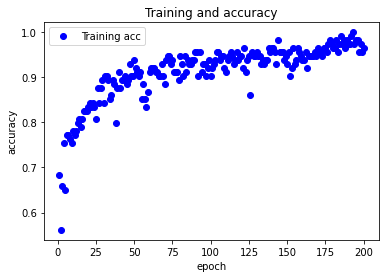

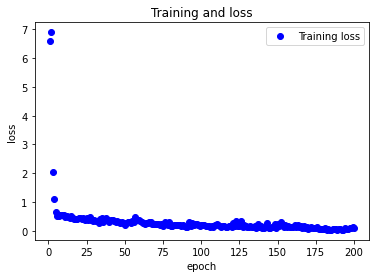

In [225]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [ ]:
plt.imshow(X_test[0])

In [227]:
predictions = model.predict(X_test)

In [228]:
predictions[0]

array([4.137553e-06, 9.999958e-01], dtype=float32)

In [229]:
score_0 = tf.nn.softmax(predictions[0])

In [230]:
np.argmax(score_0)

1

In [231]:
y_test[0]

1

In [232]:
score = tf.nn.softmax(predictions)
y_pred = []
for i in range(0,len(y_test)):
    y_pred.append(np.argmax(tf.nn.softmax(predictions[i])))

In [233]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1])

In [234]:
y_test.shape

(50,)

Text(69.0, 0.5, 'Truth')

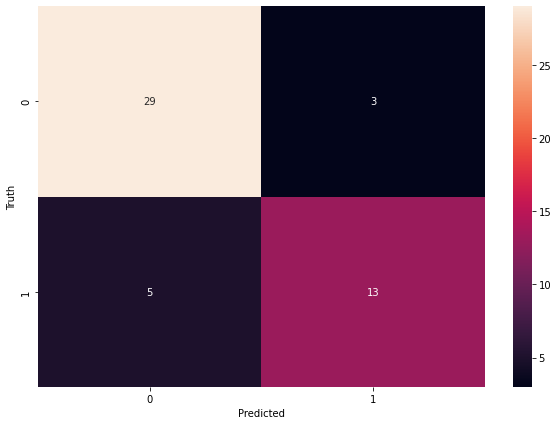

In [235]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [236]:
# Exemple of an ID card picture

In [237]:
#from tensorflow.keras.preprocessing import image

In [238]:
img = cv2.imread(r'C:\Users\LENOVO\Desktop\Card_datection\Image_detection\test_picture.jpg')
#img = image.load_img(r'C:\Users\LENOVO\Desktop\Card_datection\Image_detection\test_picture.jpg')

In [239]:
img.shape

(366, 640, 3)

In [240]:
img1 = cv2.resize(img,(100,50), interpolation=cv2.INTER_LINEAR)

In [241]:
img1.shape

(50, 100, 3)

In [ ]:
plt.imshow(img1)

In [243]:
#img1=np.reshape(img1,(img1.shape[0], img1.shape[1], img1.shape[2],1))
img1 = img1.reshape(-1, 50, 100, 1)

In [244]:
img1.shape

(3, 50, 100, 1)

In [245]:
img1 = img1[0,:,:,0]

In [246]:
img1.shape

(50, 100)

In [247]:
from tensorflow.keras.preprocessing import image

In [248]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)

In [249]:
img1.shape

(1, 50, 100, 1)

In [250]:
a = model.predict(img1)

In [251]:
score = tf.nn.softmax(a)

In [252]:
np.argmax(score)

0